<a href="https://colab.research.google.com/github/ulya1202/emotion_detection/blob/main/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('hello')

hello


# Import

In [1]:
!pip install keras-cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 62.2 MB/s eta 0:00:00


In [2]:

import keras
import keras_cv # This line should now work
from keras import ops
from keras import layers

In [3]:
import matplotlib.image as mpimg
import zipfile
import shutil
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import numpy as np
import urllib.request
import pandas as pd
import pathlib
import random

## Import Data

In [4]:
# from google.colab import files
# files.upload()

In [5]:
# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [6]:
# !kaggle datasets download -d sujaykapadnis/emotion-recognition-dataset

In [7]:
!curl -L -o emotion-recognition-dataset.zip https://www.kaggle.com/api/v1/datasets/download/sujaykapadnis/emotion-recognition-dataset/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2027M  100 2027M    0     0  21.3M      0  0:01:34  0:01:34 --:--:-- 22.1M


In [8]:

with zipfile.ZipFile('/content/emotion-recognition-dataset.zip','r') as zip_ref:
  zip_ref.extractall()

In [9]:
shutil.rmtree('/content/dataset/Ahegao')

## import my_photos

In [10]:
!wget -O "profile_picture2.jpg" "https://media.licdn.com/dms/image/v2/D4E03AQFmdgo0GMmguw/profile-displayphoto-shrink_200_200/profile-displayphoto-shrink_200_200/0/1668425119293?e=1749081600&v=beta&t=6THSYK9tDF_Ive35xpTQqwoc1ThbmKUcoer4dx_g1O8"
!wget -O 'mr_beean.jpg' 'https://i.pinimg.com/474x/f9/f5/7d/f9f57daf091390410c6cf4dd337500a2.jpg'

--2025-06-23 15:59:23--  https://media.licdn.com/dms/image/v2/D4E03AQFmdgo0GMmguw/profile-displayphoto-shrink_200_200/profile-displayphoto-shrink_200_200/0/1668425119293?e=1749081600&v=beta&t=6THSYK9tDF_Ive35xpTQqwoc1ThbmKUcoer4dx_g1O8
Resolving media.licdn.com (media.licdn.com)... 23.53.118.108, 23.53.118.100, 2600:1417:3f::1732:e8b8, ...
Connecting to media.licdn.com (media.licdn.com)|23.53.118.108|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2025-06-23 15:59:23 ERROR 403: Forbidden.

--2025-06-23 15:59:23--  https://i.pinimg.com/474x/f9/f5/7d/f9f57daf091390410c6cf4dd337500a2.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.202.33.193, 23.202.33.217, 23.202.33.216, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.202.33.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17325 (17K) [image/jpeg]
Saving to: ‘mr_beean.jpg’

mr_beean.jpg        100%[===================>]  16.92K  --.-KB/s    in 0.002s  

2025-06-23 15:59:23 (7.06 MB/s

In [11]:
!wget -O 'novruz.jpg''https://bakimektebleri.edu.az/uploads/album_photos/1429078697552e02a94b3ed0.74405402.jpg'
!wget -O 'bilbo.jpg' 'https://i.redd.it/1mtxc8cng8r91.jpg'

wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.
--2025-06-23 15:59:23--  https://i.redd.it/1mtxc8cng8r91.jpg
Resolving i.redd.it (i.redd.it)... 151.101.1.140, 151.101.65.140, 151.101.129.140, ...
Connecting to i.redd.it (i.redd.it)|151.101.1.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75974 (74K) [image/jpeg]
Saving to: ‘bilbo.jpg’

bilbo.jpg           100%[===================>]  74.19K  --.-KB/s    in 0.003s  

2025-06-23 15:59:23 (26.0 MB/s) - ‘bilbo.jpg’ saved [75974/75974]



# Functions

In [12]:

def view_images_n(path,target_class,n):
    target_path=pathlib.Path(path)/target_class
    if n<len(os.listdir(target_path)):
        img_random=random.sample(os.listdir(target_path),n)
    else:
        img_random=random.sample(os.listdir(target_path),len(os.listdir(target_path)))
    plt.figure(figsize=(16,16))

    for i in range(n):
        if i<len(os.listdir(target_path)):
            plt.subplot(int(np.ceil(n**0.5)),int(np.ceil(n**0.5)),i+1)
            path_image=pathlib.Path(target_path)/img_random[i]
            image=mpimg.imread(path_image)
            plt.imshow(image)
            plt.axis('off')
            plt.title(f'Images shape:{image.shape}',fontsize=8)
            plt.tight_layout()
        else:
            break

#EDA

## Data Distribution

In [ ]:


x_=[]
y_=[]

for dirpath, dirnames,filenames in os.walk('/content/dataset'):
  x_.append(os.path.basename(dirpath))
  y_.append(len(filenames))

  print(f'There are{len(dirnames)} directories and {len(filenames)} images in {os.path.basename(dirpath)}')

There are5 directories and 0 images in dataset
There are0 directories and 1234 images in Surprise
There are0 directories and 4027 images in Neutral
There are0 directories and 3934 images in Sad
There are0 directories and 1313 images in Angry
There are0 directories and 3740 images in Happy


In [ ]:
our_dist=pd.DataFrame({'state':x_,'count':y_}).set_index('state').drop(['dataset'])
our_dist

,count
state,
Surprise,1234
Neutral,4027
Sad,3934
Angry,1313
Happy,3740


In [ ]:
total=sum(our_dist['count'])
our_dist['proportion']=total/our_dist['count']

In [ ]:

maxes=max(our_dist['proportion'])
mins=min(our_dist['proportion'])
our_dist['proportion']=((our_dist['proportion'])/(maxes-mins))
our_dist['total_if_ptoc']=our_dist['proportion']*our_dist['count']
our_dist

,count,proportion,total_if_ptoc
state,,,
Surprise,1234,1.441819,1779.20444
Neutral,4027,0.441819,1779.20444
Sad,3934,0.452263,1779.20444
Angry,1313,1.355068,1779.20444
Happy,3740,0.475723,1779.20444


In [ ]:
weights_for_each_class=our_dist['proportion']

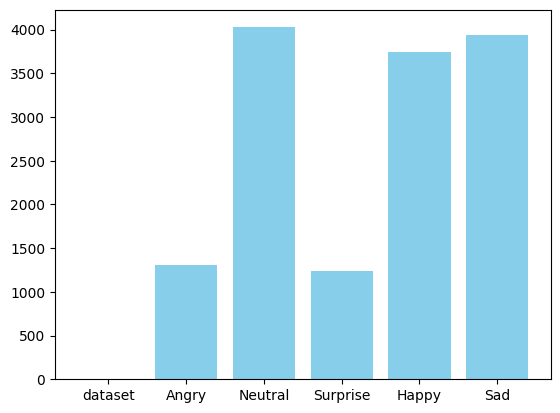

In [ ]:


plt.bar(x_,y_, color='skyblue');

In [ ]:
dataset_dir='/content/dataset'

In [ ]:
classes=os.listdir(dataset_dir)

In [ ]:
class_shape_di={}
in_this_class_have_2d={}

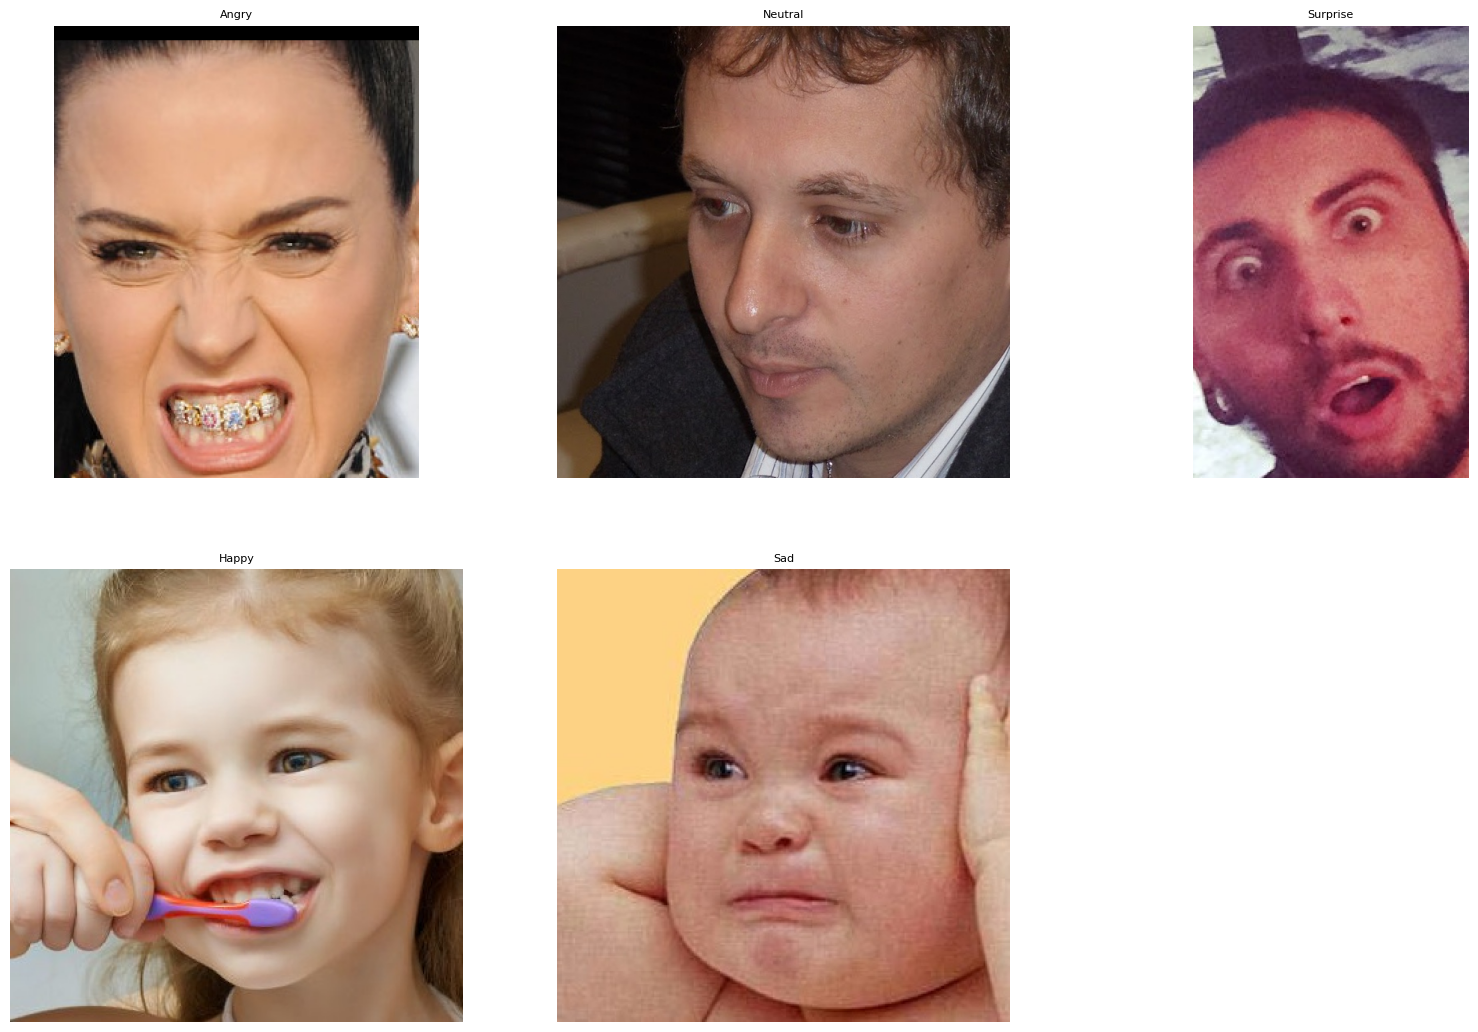

In [ ]:
plt.figure(figsize=(20,20))
for i, clas in enumerate(classes):
    class_path=os.path.join(dataset_dir,clas)
    images_of_class=os.listdir(class_path)
    class_shape_di[clas] = class_shape_di.get(clas, {})
    h=[]
    w=[]
    d=[]
    g_s_img=[]
    for i_,img_name in enumerate(images_of_class):
         img_of_class_p=os.path.join(class_path,img_name)
         image_of_class=mpimg.imread(img_of_class_p)
         h.append(image_of_class.shape[0])
         w.append(image_of_class.shape[1])
         if len(image_of_class.shape) == 3:
            d.append(image_of_class.shape[2])
         else:
            d.append(0)
            g_s_img.append(img_name)
            in_this_class_have_2d[clas]=g_s_img

         if i_+1==len(images_of_class):
            m_w=(sum(w)/len(w))
            m_h=(sum(h)/len(h))
            m_d=(sum(d)/len(d))
            h=[]
            w=[]
            d=[]
            continue


    class_shape_di[clas]['h']=m_h
    class_shape_di[clas]['w']=m_w
    class_shape_di[clas]['color']=m_d

    random_img=random.sample(images_of_class,1)
    img_dir=os.path.join(class_path,random_img[0])
    image=mpimg.imread(img_dir)
    plt.subplot(int(np.ceil(len(classes)**0.5)),int(np.ceil(len(classes)**0.5)),i+1)
    plt.imshow(image)
    plt.title(clas, fontsize=8)
    plt.axis('off')

In [ ]:
pd.DataFrame(class_shape_di).round()

,Angry,Neutral,Surprise,Happy,Sad
h,380.0,464.0,399.0,447.0,480.0
w,319.0,435.0,273.0,424.0,452.0
color,3.0,3.0,3.0,3.0,3.0


In [ ]:
in_this_class_have_2d

{}

## Data load

In [13]:

IMG_SIZE=(224,224)
batch_size=32
data_path='/content/dataset'


train_data=tf.keras.utils.image_dataset_from_directory(
    data_path,
    label_mode='categorical',
    image_size=IMG_SIZE,
    crop_to_aspect_ratio=True,
    subset='training',
    validation_split=0.2,
    seed=42   #########seed onemlidi
)
test_data=tf.keras.utils.image_dataset_from_directory(
    data_path,
    label_mode='categorical',
    image_size=IMG_SIZE,
    crop_to_aspect_ratio=True,
    subset='validation',
    validation_split=0.2,
    seed=42    ##############seed olmalida ##mentiqle 3 hisseye olar bolmek
)



Found 14248 files belonging to 5 classes.
Using 11399 files for training.
Found 14248 files belonging to 5 classes.
Using 2849 files for validation.


## Data Visualization

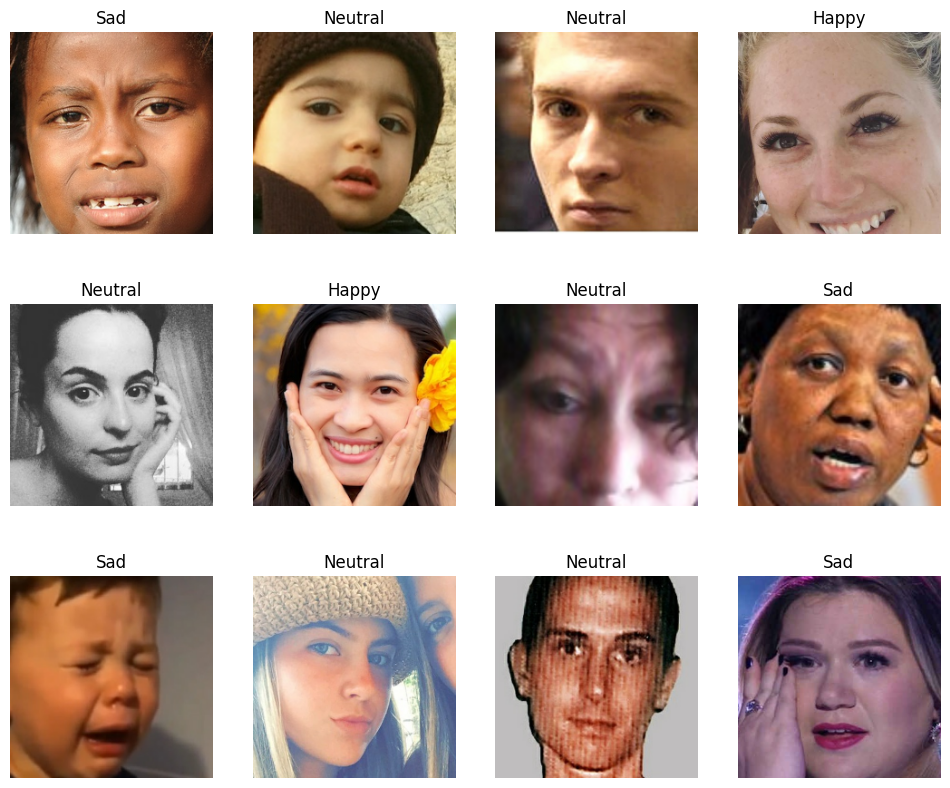

In [ ]:


class_names=train_data.class_names

plt.figure(figsize=(12,10))
for images, labels in train_data.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[np.argmax(labels[i].numpy())])
    plt.axis('off')

# Data Aug

In [ ]:
aug=tf.keras.Sequential([
    tf.keras.layers.RandomZoom(height_factor=(-0.4, 0.2)),
    keras_cv.layers.RandAugment(value_range=(0, 255), augmentations_per_image=2, magnitude=0.1)
])

In [14]:
aug2= tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.RandomZoom(0.2)
])


NameError: name 'classes' is not defined

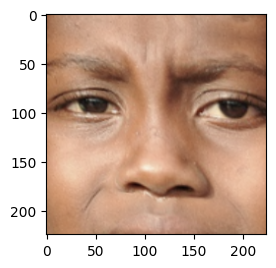

In [ ]:
plt.figure(figsize=(20,20))
for images,labels in (train_data.take(1)):
    aug_images=aug(images)
    if batch_size<50:
        for i in range(batch_size):
            plt.subplot(int(np.ceil(batch_size**0.5)),int(np.ceil(batch_size**0.5)),i+1)
            plt.imshow(aug_images[i].numpy().astype("uint8"))
            class_index_in_one_hot=labels.numpy().astype('int')[i]
            class_index=np.argmax(class_index_in_one_hot)
            plt.title(classes[class_index])
            plt.axis('off')

In [ ]:
plt.figure(figsize=(20,20))
for images,labels in (train_data.take(1)):
    aug2_images=aug2(aug(images))
    if batch_size<50:
        for i in range(batch_size):
            plt.subplot(int(np.ceil(batch_size**0.5)),int(np.ceil(batch_size**0.5)),i+1)
            plt.imshow(aug2_images[i].numpy().astype("uint8"))
            class_index_in_one_hot=labels.numpy().astype('int')[i]
            class_index=np.argmax(class_index_in_one_hot)
            plt.title(classes[class_index])
            plt.axis('off')

In [15]:
# train_aug=train_data.map(lambda X,y:(aug(X),y),num_parallel_calls=tf.data.AUTOTUNE) #for extra learning
# train_aug=train_aug.prefetch(tf.data.AUTOTUNE)

In [ ]:
# train_data_1=train_data.map(lambda X,y:(X,y),num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE) #

In [16]:
train_data=train_data.prefetch(tf.data.AUTOTUNE)
test_data=test_data.prefetch(tf.data.AUTOTUNE)

In [ ]:
# combined = train_data_1.concatenate(train_aug)
# combined = combined.shuffle(1000).prefetch(tf.data.AUTOTUNE)

# (Sample) Model

## Model from Scratch

In [ ]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224,224,3)),
    tf.keras.layers.Rescaling(1/255.),
    tf.keras.layers.Conv2D(64,kernel_size=7, strides=3, padding='same',
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, kernel_size=3, padding='same',
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(128, kernel_size=3, padding='same',
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(256, kernel_size=3, padding='same',
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(256, kernel_size=3, padding='same',
                           activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 75, 75, 64)          │           9,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 18, 18, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      10,617,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,766,661 (44.89 MB)

 Trainable params: 11,766,661 (44.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy', 'f1_score']
)

history1=model.fit(train_data, epochs=5, validation_data=test_data)

Epoch 1/5
 16/357 ━━━━━━━━━━━━━━━━━━━━ 52s 154ms/step - accuracy: 0.2365 - f1_score: 0.1770 - loss: 2.7571

KeyboardInterrupt: 

## Transfer learning Resnet

In [ ]:
inputs=tf.keras.Input(shape=(224,224,3))

x=tf.keras.applications.resnet50.preprocess_input(inputs)
base_model=tf.keras.applications.ResNet50(include_top=False, input_tensor=x)

avg=tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output=tf.keras.layers.Dense(5, activation='softmax')(avg)

model=tf.keras.Model(inputs=inputs, outputs=output)

In [ ]:
base_model.trainable=False


In [ ]:
initial_learning_rate=0.01
lr_schedule=tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=200,
    decay_rate=0.96
)

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

checkpoint=tf.keras.callbacks.ModelCheckpoint(
    'emotional_detector.keras',
    save_best_only=True
)

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=['accuracy', 'f1_score']
)

history2=model.fit(train_data, epochs=15, validation_data=test_data, callbacks=[early_stopping, checkpoint])

### Prediction Visualization

In [ ]:

def pred_and_plot(model, image_path):
  plt.figure(figsize=(8,5))
  image=mpimg.imread(image_path)
  image=tf.image.resize(image,(224,224) )
  pred_probas=model.predict(tf.expand_dims(image, axis=0))
  plt.subplot(1,2,1)
  plt.imshow(image/255)
  pred=class_names[np.argmax(pred_probas)]
  plt.title(f'predicted class:{pred}')
  plt.axis('off')
  print(f'predcted class:{pred}')
  plt.subplot(1,2,2)
  plt.bar(class_names, pred_probas[0])
  plt.xlabel('class')
  plt.ylabel('probability')
  plt.show()



In [ ]:
pred_and_plot(model,"profile_picture.jpg")

In [ ]:
pred_and_plot(model,"/content/mr_beean.jpg")

In [ ]:
pred_and_plot(model,"/content/bilbo.jpg")

In [ ]:
#son besh layer donun azalt , erroe anlayz, 80 faiz, exceptions- derinniye cox fikir verir.

# Models

## Transfer learninig XCeption

In [17]:
inputs=tf.keras.layers.Input(shape=(224,224,3))

data_aug=aug2(inputs)
res=tf.keras.layers.Resizing(224,224)(data_aug)

x = tf.keras.applications.xception.preprocess_input(res)
base_model=tf.keras.applications.Xception(weights='imagenet',include_top=False, input_tensor=x)

base_model.trainable=False


avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(256, activation='relu')(avg)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(5, activation='softmax')(x)

model=tf.keras.Model(inputs,output)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
# inputs=tf.keras.Input(shape=(224,224,3))

# x=tf.keras.applications.resnet50.preprocess_input(inputs)
# base_model=tf.keras.applications.ResNet50(include_top=False, input_tensor=x)

# avg=tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
# output=tf.keras.layers.Dense(5, activation='softmax')(avg)

# model=tf.keras.Model(inputs=inputs, outputs=output)

In [ ]:
# def mode_choose(model_name, train=False):
#   input=tf.keras.Input(shape=(224,224,3))
#   inputs=aug2(input)
#   if model_name=='resnet50':
#     x=tf.keras.applications.resnet.preprocess_input(inputs)
#     base_model=tf.keras.applications.ResNet50(include_top=False, input_tensor=x)
#   if model_name=='xception':
#     x=tf.keras.applications.xception.preprocess_input(inputs)
#     base_model=tf.keras.applications.Xception(include_top=False, input_tensor=x)
#   if model_name=='vgg16':
#      x=tf.keras.applications.vgg16.preprocess_input(inputs)
#      base_model=tf.keras.applications.VGG16(include_top=False, input_tensor=x)
#   if model_name=='efficientnet':
#     tf.keras.applications.efficientnet.preprocess_input(inputs)
#     base_model=tf.keras.applications.EfficientNetB0(include_top=False, input_tensor=x)
#   if model_name=='vgg19':
#      x=tf.keras.applications.vgg19.preprocess_input(inputs)
#      base_model=tf.keras.applications.VGG19(include_top=False, input_tensor=x)

#   avg=tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
#   denses=tf.keras.layers.Dense(128,activation='relu', kernel_initializer='he_normal')(avg)
#   dropout=tf.keras.layers.Dropout(0.1)(denses)
#   denses2=tf.keras.layers.Dense(128,activation='relu', kernel_initializer='he_normal')(dropout)
#   output=tf.keras.layers.Dense(5, activation='softmax')(denses2)

#   if train==False:
#     base_model.trainable=False
#   if train==True:
#     for layer in base_model.layers[-5:]:
#       layer.trainable=True

#   model=tf.keras.Model(inputs=input, outputs=output)
#   # optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)

#   # model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'] )
#   return model





## Callbacks: EarlyStopping & ReduceLROnPlateau

In [18]:
initial_learning_rate=0.0001
lr_schedule=tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=596,
    decay_rate=0.96
)


early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True

)
checkpoint_cb=tf.keras.callbacks.ModelCheckpoint(
    'emotions_detector.keras',
    save_best_only=True,
)

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Nadam(learning_rate=lr_schedule),
              metrics=['accuracy', 'f1_score'])

# filepath='/content/drive/MyDrive/best_model.keras'
# model_checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath,save_best_only=True)

# reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor='val_loss',
#     factor=0.2,
#     patience=2,
#     min_lr=1e-6
# )

# initial_learning_rate=0.01
# lr_schedule=tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=357 ,
#     decay_rate=0.96
# )


#Model Training and Evaluation

In [ ]:
model.fit(train_data, validation_data=test_data, epochs=100,callbacks=[early_stopping, checkpoint_cb ])

In [ ]:
for layer in base_model.layers[-3:]:
  layer.trainbale=True
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Nadam(learning_rate=lr_schedule),
              metrics=['accuracy', 'f1_score'])
model.fit(train_data, validation_data=test_data, epochs=100,callbacks=[early_stopping, checkpoint_cb ])

In [ ]:
for layer in base_model.layers[-5:]:
  layer.trainbale=True
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Nadam(learning_rate=lr_schedule),
              metrics=['accuracy', 'f1_score'])
model.fit(train_data, validation_data=test_data, epochs=100,callbacks=[early_stopping, checkpoint_cb ])

In [ ]:
for layer in base_model.layers[-7:]:
  layer.trainbale=True
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Nadam(learning_rate=lr_schedule),
              metrics=['accuracy', 'f1_score'])
model.fit(train_data, validation_data=test_data, epochs=100,callbacks=[early_stopping, checkpoint_cb ])

In [ ]:

# model.evaluate(train_data)


# model.evaluate(test_data)
model.save('emotion-predictions.keras')

#Error analysis

In [ ]:
model.predict(test_data).shape

90/90 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step


(2849, 5)

In [ ]:
y_pred=np.argmax(model.predict(test_data), axis=1)

90/90 ━━━━━━━━━━━━━━━━━━━━ 15s 162ms/step


In [ ]:
y_true=[]
for images , labels in test_data:
  for label in labels:
    y_true.append(np.argmax(label))

y_true=np.array(y_true)



In [ ]:
import sklearn.metrics

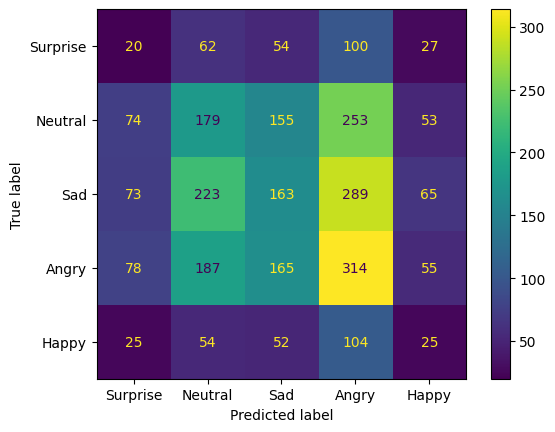

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay # Import the ConfusionMatrixDisplay class
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=classes)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=classes))

              precision    recall  f1-score   support

    Surprise       0.07      0.08      0.08       263
     Neutral       0.25      0.25      0.25       714
         Sad       0.28      0.20      0.23       813
       Angry       0.30      0.39      0.34       799
       Happy       0.11      0.10      0.10       260

    accuracy                           0.25      2849
   macro avg       0.20      0.20      0.20      2849
weighted avg       0.24      0.25      0.24      2849



In [ ]:
classes = np.array(classes)

In [ ]:
classes

array(['Surprise', 'Neutral', 'Sad', 'Angry', 'Happy'], dtype='<U8')

In [ ]:
sklearn.metrics.confusion_matrix(y_true, y_pred)

array([[ 32,  63,  47, 103,  18],
       [ 59, 165, 146, 285,  59],
       [ 87, 206, 175, 292,  53],
       [ 62, 220, 162, 283,  72],
       [ 30,  51,  59,  97,  23]])